<a href="https://colab.research.google.com/github/yeyevtushenko/AI/blob/Lesson28.02.2024/Lesson28_02_2024_AI_P_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [24]:
import pandas as pd

In [ ]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [26]:
average  = sales["Order_Quantity"].mean()
median = sales["Order_Quantity"].median()

print(average, median)

11.901659648253654 10.0


# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

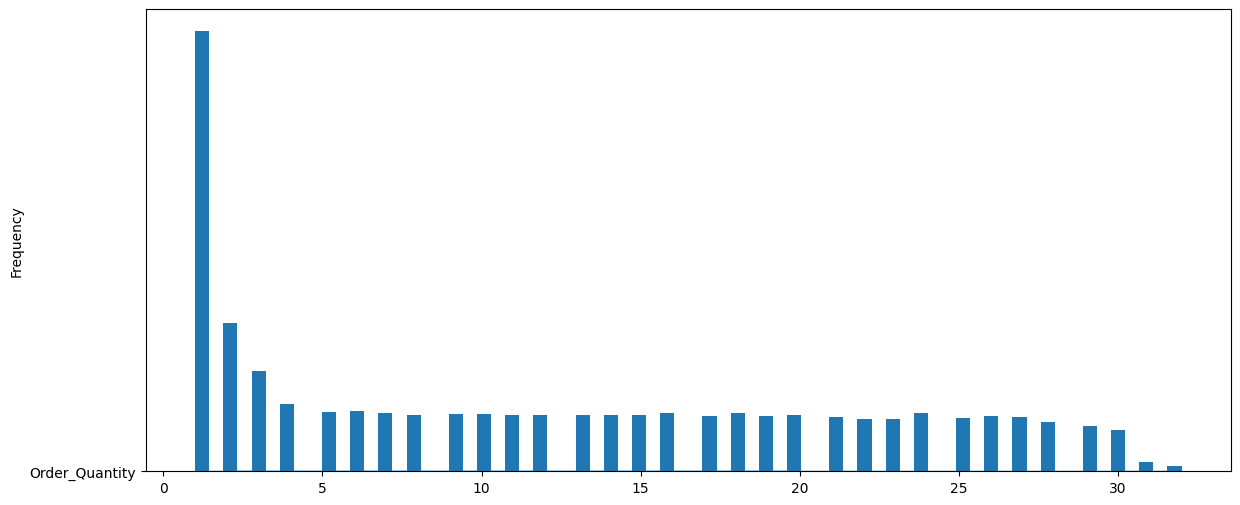

In [27]:
ax = sales['Order_Quantity'].plot(kind='hist',bins=70,figsize=(14,6))
ax = sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Обчислюємо медіану `median`
3. Очислюємо значення `IQR = q3 - q1`
4. Обчислюємо `lower = q1 - 1.5*IQR`
5. Обчислюємо `upper = q3 + 1.5*IQR`
6. Викидами вважаємо значення які `< lower` або `>upper`

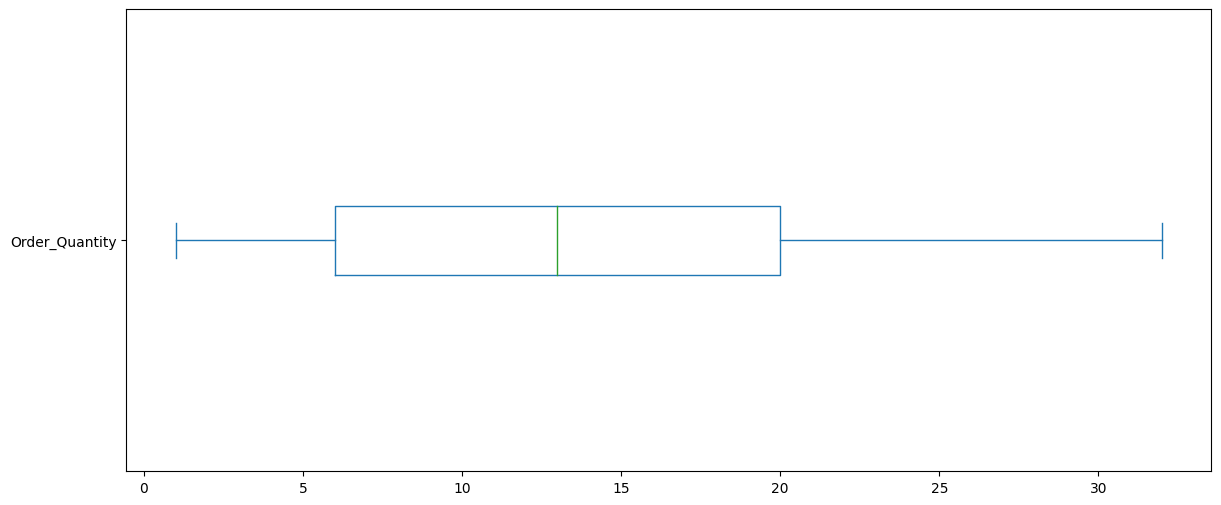

In [29]:
def outliers(df, column_name):
  column = df[column_name]

  Q1 = column.quantile(q=0.25)
  Q3 = column.quantile(q=0.75)

  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  mask = (column >= lower) & (column <= upper)

  return df[mask]

for column_name in sales.columns:
  if sales.dtypes[column_name] == 'object':
    continue

  sales = outliers(sales, column_name)

ax = sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

M    34578
F    32836
Name: Customer_Gender, dtype: int64


<Axes: >

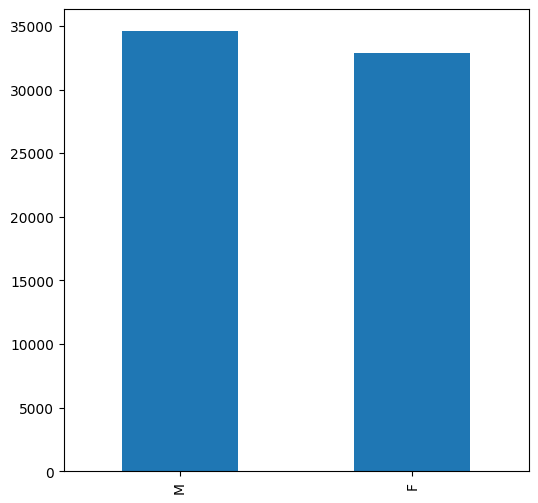

In [30]:
print(sales['Customer_Gender'].value_counts())
sales['Customer_Gender'].value_counts().plot(kind='bar', figsize=(6,6))

# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

<Axes: xlabel='Order_Quantity', ylabel='Revenue'>

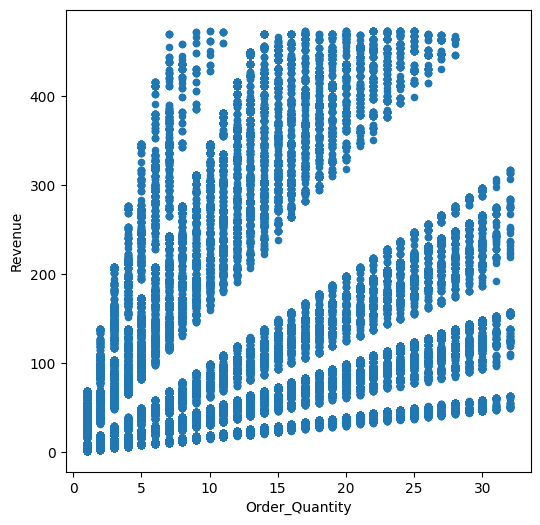

In [31]:
sales.plot(kind='scatter', x='Order_Quantity', y='Revenue', figsize=(6,6))

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`